# Group 1:  Yuexin Ma 002738557, Xin Shen 002728429, Qi Li 002773365

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import seaborn as sns 
sns.set(style = "whitegrid")

# Clustering methods
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Evaluation metrics
from sklearn import metrics

# Task1

In [2]:
df1 = pd.read_csv('Data1.csv', index_col=0)
df2 = pd.read_csv('Data2.csv', index_col=0)
df3 = pd.read_csv('Data3.csv', index_col=0)
df4 = pd.read_csv('Data4.csv', index_col=0)
df5 = pd.read_csv('Data5.csv', index_col=0)
df1.head()
df2.head()
df3.head()
df4.head()
df5.head()

,X1,X2,X3,Class
1,-0.063274,0.027734,0.022683,1
2,-0.000731,0.048211,0.069198,1
3,-0.060767,-0.009080,0.053085,1
4,0.013252,-0.011876,0.055324,1
5,-0.054508,-0.003813,0.001738,1


,X,Y,C,Class
X1,3.277701,0.814082,0.326574,1
X2,0.387577,0.176780,0.888046,1
X3,0.268546,0.582963,0.080981,1
X4,2.031145,0.244597,0.643921,1
X5,0.188677,0.461280,0.496633,1


,X1,X2,X3,Class
1,1.295428,0.050829,-0.385217,1
2,1.409178,-0.035191,-0.251980,1
3,1.096803,0.246365,-0.415011,1
4,1.463328,0.265354,-0.513488,1
5,1.603284,0.080577,-0.470257,1


,X1,X2,X3,Class
1,-0.4530,-0.891,0.02300,1
2,0.6530,-0.846,0.02110,1
3,0.3980,0.913,-0.00139,1
4,0.0952,1.050,0.00628,1
5,0.5240,-0.941,0.03780,1


,X1,X2,X3,Class
1,-4.822490,-50.402170,4.020861,1
2,-44.460120,20.964670,-11.492060,1
3,50.001020,0.780748,9.134460,1
4,-41.699080,-22.310060,16.314120,1
5,4.425242,-4.666664,50.223740,1


In [3]:
# uniform format for further analysis
df2 = df2.rename(columns={'X':'X1', 'Y':'X2', 'C':'X3'})
df2.index = pd.Series(np.arange(1, len(df2)+1))

## 1. Clustering
## 1-1 K-Means

When we use K-Means algorithm, we need to find K first.  
The function below will loop through 1-10 clusters, running K-Means for each. This will give us our "inertia" values, which we can plot against K to make an elbow plot.

In [4]:
def kmfindk(df):
    inertias = []
    ds = df[['X1','X2','X3']]
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, random_state = 7)
        kmeans.fit(ds)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8,6))
    plt.plot(range(1,11), inertias)
    plt.xlabel("K (number of clusters)")
    plt.ylabel("Inertia (Within-Cluster Distances)")
    plt.show()

Run the function for each dataset, choose the K where we can see a pronounced change in slope.  

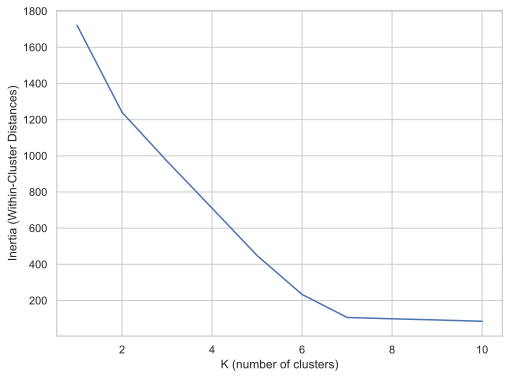

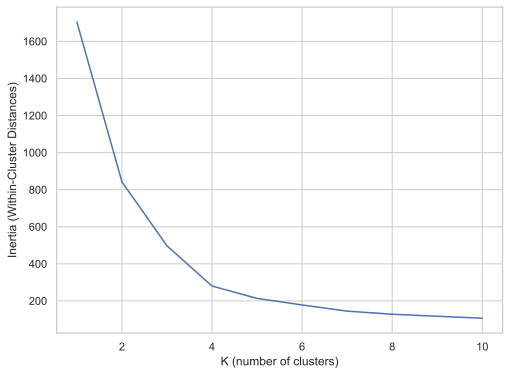

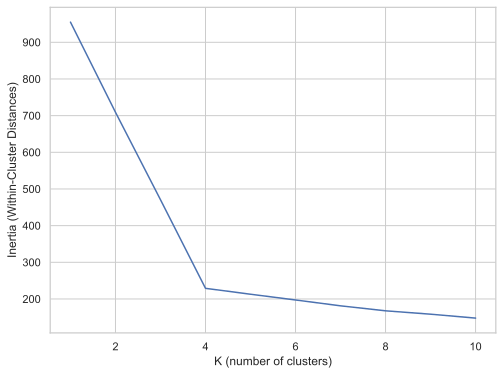

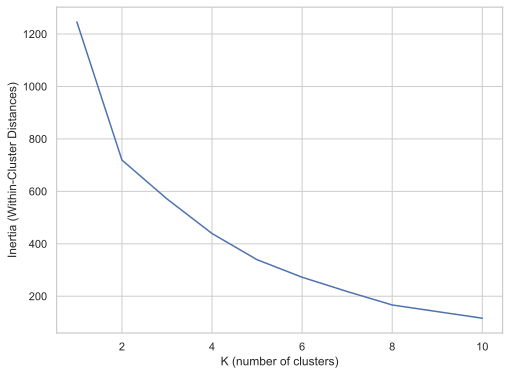

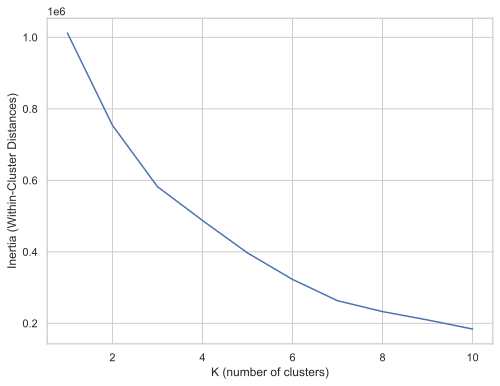

In [5]:
kmfindk(df1)
kmfindk(df2)
kmfindk(df3)
kmfindk(df4)
kmfindk(df5)

Obviously, for data1, after k=7, the plot flattens out substantially. Therefore 7 is our "elbow" and we should probably choose k=7.  
Similarly,  
data2, k2 = 4;  
data3, k3 = 4;  
data4, k4 = 2;  
data5, k5 = 2.

In [6]:
# define K of each dataset
k1 = 7
k2 = 4
k3 = 4
k4 = 2
k5 = 2

Then write a function to apply K-Means method on each datasets to generate clusters.  

In [7]:
def kmeans(k, df):
    ds = df.copy()
    y_KMeans = KMeans(n_clusters = k, random_state = 7)
    y_pred = y_KMeans.fit_predict(ds[['X1', 'X2', 'X3']])
    
    # get the labels
    ds['labels'] = y_KMeans.labels_
    display(ds.head())
    display(ds['labels'].value_counts())
    return ds

In [8]:
# get the clustered dataframes
ds1 = kmeans(k1, df1)
ds2 = kmeans(k2, df2)
ds3 = kmeans(k3, df3)
ds4 = kmeans(k4, df4)
ds5 = kmeans(k5, df5)

,X1,X2,X3,Class,labels
1,-0.063274,0.027734,0.022683,1,3
2,-0.000731,0.048211,0.069198,1,3
3,-0.060767,-0.009080,0.053085,1,3
4,0.013252,-0.011876,0.055324,1,3
5,-0.054508,-0.003813,0.001738,1,3


3    32
2    30
5    30
4    30
6    30
0    30
1    30
Name: labels, dtype: int64

,X1,X2,X3,Class,labels
1,3.277701,0.814082,0.326574,1,0
2,0.387577,0.176780,0.888046,1,3
3,0.268546,0.582963,0.080981,1,3
4,2.031145,0.244597,0.643921,1,0
5,0.188677,0.461280,0.496633,1,3


3    141
1    100
0     83
2     80
Name: labels, dtype: int64

,X1,X2,X3,Class,labels
1,1.295428,0.050829,-0.385217,1,2
2,1.409178,-0.035191,-0.251980,1,2
3,1.096803,0.246365,-0.415011,1,2
4,1.463328,0.265354,-0.513488,1,2
5,1.603284,0.080577,-0.470257,1,2


2    100
0    100
3    100
1    100
Name: labels, dtype: int64

,X1,X2,X3,Class,labels
1,-0.4530,-0.891,0.02300,1,0
2,0.6530,-0.846,0.02110,1,0
3,0.3980,0.913,-0.00139,1,1
4,0.0952,1.050,0.00628,1,1
5,0.5240,-0.941,0.03780,1,0


0    500
1    500
Name: labels, dtype: int64

,X1,X2,X3,Class,labels
1,-4.822490,-50.402170,4.020861,1,0
2,-44.460120,20.964670,-11.492060,1,0
3,50.001020,0.780748,9.134460,1,0
4,-41.699080,-22.310060,16.314120,1,1
5,4.425242,-4.666664,50.223740,1,1


0    629
1    171
Name: labels, dtype: int64

## 1-2 Hierarchical Clustering
When we use Hierarchical method to generate clusters, we can plot a full dendrogram and choose the correct number of clusters.  
The below function will plot the full dendrogram.  

In [9]:
def plot_dendrogram(df, **kwargs):
    plt.figure(figsize=(6,6))
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    
    ds = df.copy()
    # setting distance_threshold=0 ensures we compute the full tree.
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(ds.drop(columns=["Class"]))
    
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    plt.show()

Run the function for each data set, use the dendrogram to examine the distances between clusters and find the meaningful K.  

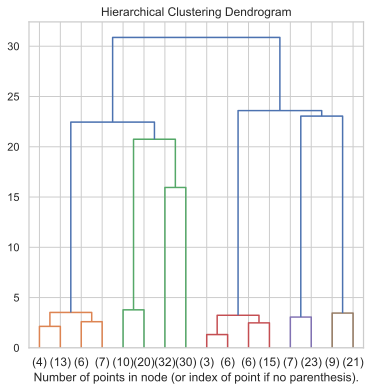

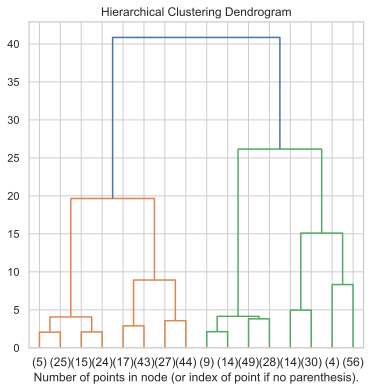

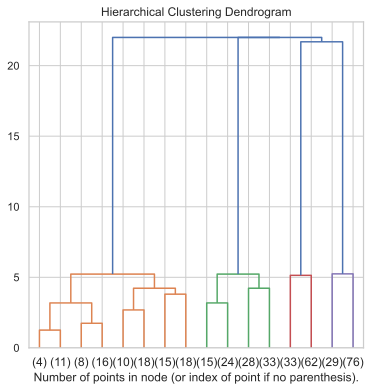

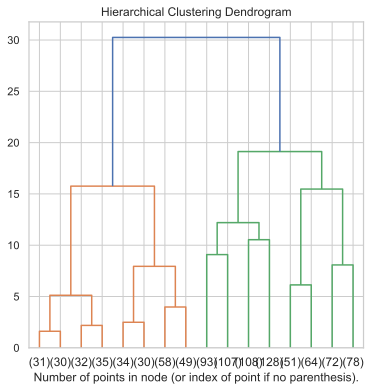

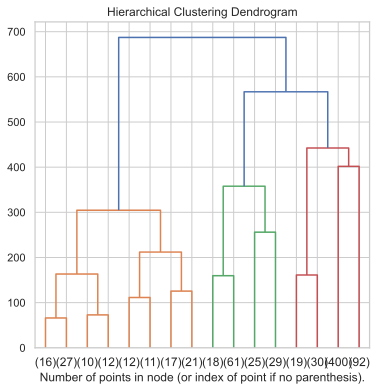

In [10]:
# plot the top three levels of the dendrogram for each data set
plot_dendrogram(df1, truncate_mode="level", p=3)
plot_dendrogram(df2, truncate_mode="level", p=3)
plot_dendrogram(df3, truncate_mode="level", p=3)
plot_dendrogram(df4, truncate_mode="level", p=3)
plot_dendrogram(df5, truncate_mode="level", p=3)

As shown above, for data set 1, we can see a huge decrease in the distance metric when going from 1 to 2, 2 to 3...and 6 to 7. After 7 clusters, the decrease trend becomes quite smooth, so K=7 should be answer.  
Therefore, for data1, K1 = 7;  
Similarly,  
data2, K2 = 4;  
data3, K3 = 4;  
data4, K4 = 2;  
data5, K5 = 2.

In [11]:
# define K of each dataset
K1 = 7
K2 = 4
K3 = 4
K4 = 2
K5 = 2

Write a function to apply Hierarchical method on each datasets to generate clusters.  

In [12]:
def hierarchical(K, df):
    ds = df.copy()
    y_HC = AgglomerativeClustering(n_clusters = K)
    y_pred = y_HC.fit_predict(ds[['X1', 'X2', 'X3']])
    
    ds['labels'] = y_HC.labels_
    display(ds.head())
    display(ds['labels'].value_counts())
    return ds

In [13]:
# Get the clustered dataframes
DS1 = hierarchical(K1, df1)
DS2 = hierarchical(K2, df2)
DS3 = hierarchical(K3, df3)
DS4 = hierarchical(K4, df4)
DS5 = hierarchical(K5, df5)

,X1,X2,X3,Class,labels
1,-0.063274,0.027734,0.022683,1,6
2,-0.000731,0.048211,0.069198,1,6
3,-0.060767,-0.009080,0.053085,1,6
4,0.013252,-0.011876,0.055324,1,6
5,-0.054508,-0.003813,0.001738,1,6


6    32
4    30
2    30
5    30
1    30
0    30
3    30
Name: labels, dtype: int64

,X1,X2,X3,Class,labels
1,3.277701,0.814082,0.326574,1,3
2,0.387577,0.176780,0.888046,1,1
3,0.268546,0.582963,0.080981,1,1
4,2.031145,0.244597,0.643921,1,1
5,0.188677,0.461280,0.496633,1,1


1    131
0    104
2    100
3     69
Name: labels, dtype: int64

,X1,X2,X3,Class,labels
1,1.295428,0.050829,-0.385217,1,1
2,1.409178,-0.035191,-0.251980,1,1
3,1.096803,0.246365,-0.415011,1,1
4,1.463328,0.265354,-0.513488,1,1
5,1.603284,0.080577,-0.470257,1,1


0    105
1    100
2    100
3     95
Name: labels, dtype: int64

,X1,X2,X3,Class,labels
1,-0.4530,-0.891,0.02300,1,1
2,0.6530,-0.846,0.02110,1,1
3,0.3980,0.913,-0.00139,1,0
4,0.0952,1.050,0.00628,1,0
5,0.5240,-0.941,0.03780,1,1


0    701
1    299
Name: labels, dtype: int64

,X1,X2,X3,Class,labels
1,-4.822490,-50.402170,4.020861,1,1
2,-44.460120,20.964670,-11.492060,1,0
3,50.001020,0.780748,9.134460,1,0
4,-41.699080,-22.310060,16.314120,1,0
5,4.425242,-4.666664,50.223740,1,0


0    674
1    126
Name: labels, dtype: int64

## 2. Plot (3D)
Then write a function to plot(3D) the data points for each dataset and color them according to the class allocated by 2 clustering algorithms.  

In [14]:
import matplotlib.colors as mcolors
color = list(mcolors.BASE_COLORS)

def hcplot(method, k, ds):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(projection = '3d')

    # For each set of style and range settings
    i = 0
    for c in color[:k]:
        xs = ds.loc[ds['labels'] == i]['X1']
        ys = ds.loc[ds['labels'] == i]['X2']
        zs = ds.loc[ds['labels'] == i]['X3']
        ax.scatter(xs, ys, zs, color = c, s = 50)
        i = i + 1

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title(f'{method} clustering, clusters = {k}')
    ax.set_xlim(xmin = min(ds['X1'])-0.1, xmax = max(ds['X1'])+0.1)
    ax.set_ylim(ymin = min(ds['X2'])-0.1, ymax = max(ds['X2'])+0.1)
    ax.set_zlim(zmin = min(ds['X3'])-0.1, zmax = max(ds['X3'])+0.1)

    plt.show()

This is the function to plot(3D) the data points for each dataset and color them according to the original class.  

In [15]:
def plotori(df):
    ds = df.copy()
    kclass = len(ds['Class'].unique())
    Class = np.arange(1, kclass+1)
    Class = np.vstack((Class, color[:kclass]))

    # plot
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(projection = '3d')
    
    # For each set of style and range settings
    for i, c in Class.T:
        xs = ds.loc[ds['Class'] == int(i)]['X1']
        ys = ds.loc[ds['Class'] == int(i)]['X2']
        zs = ds.loc[ds['Class'] == int(i)]['X3']
        ax.scatter(xs, ys, zs, color = c, s = 50)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title(f'Original classes, class = {kclass}')
    ax.set_xlim(xmin = min(ds['X1'])-0.1, xmax = max(ds['X1'])+0.1)
    ax.set_ylim(ymin = min(ds['X2'])-0.1, ymax = max(ds['X2'])+0.1)
    ax.set_zlim(zmin = min(ds['X3'])-0.1, zmax = max(ds['X3'])+0.1)
    
    plt.show()

## 3. External validation
Compare these 2 clustering algorithms results $C$ to the given classes $P$ and use several external validation methods to to evaluate the algorithm performance.  

### Purity
Calculate the Purity to evaluate the matching accurancy.  
$$U = \sum_ip_i(max_j\frac{p_{ij}}{p_i}) = \frac{1}{n}\sum_in_i(max_j\frac{n_{ij}}{n_i})$$
where $p_i = \frac{n_i}{n},\ p_j = \frac{n_j}{n},\ p_{ij} = \frac{n_{ij}}{n},\ n_{ij}$ is the number of examples belonging to the class $i$ found in the cluster $j$ and $n_i (n_j )$ is the number of examples in the cluster $i(j)$.  
$max_j\frac{n_{ij}}{n_i}$ indicates the maximum overlap fraction between each cluster $i$ and class $j$.  
  
If $U$ is close to 1, the clustering algorithm performs perfectly.

In [16]:
# Purity
def purity(method, df):
    Labels = df['labels']
    Classes = df['Class']
    nol = Labels.unique()
    noc = Classes.unique()

    maxoverlaps = []

    for i in nol:
        indices_l = [ii for ii in range(1, len(Labels)+1) if Labels[ii]==i] 
        overlap=[]
        
        # count overlaps of each j on i
        for j in noc:
            indices_c = [jj for jj in range(1, len(Classes)+1) if Classes[jj]==j] 
            overlap.append(len(set(indices_l).intersection(indices_c)))
            
        maxoverlaps.append(max(overlap))

    purity = sum(maxoverlaps)/len(Labels)
    print(f'{method} clustering, Purity = {purity}')

### Rand coefficient
We have the knowledge of truth classes, we can use the Rand coefficient to evaluate the performance against the total data set based on peer-to-peer correlation.  
  
$$ Rand = \frac{TP + TN}{M}$$  
where $TP$ is the number of data pairs found in the same cluster, both in $C$ and in $P$, $TN$ is the number of data pairs found in different clusters, both in $C$ and in $P$.  
  
If Rand coefficient is close to 1, the clustering algorithm performs perfectly.

In [17]:
def rand(method, df):
    labels_true = df['Class']
    labels_pred = df['labels']
    score = metrics.adjusted_rand_score(labels_true, labels_pred)
    print(f'{method} clustering, Rand = {score}')

### Mutual information
Based on information theory.  
Mutual Information measures the agreement of $C$ and $P$.
If the score is close to 1, the clustering algorithm performs perfectly.  
If Mutual information is close to 1, the clustering algorithm performs perfectly.

In [18]:
def mutualinfo(method, df):
    labels_true = df['Class']
    labels_pred = df['labels']
    score = metrics.adjusted_mutual_info_score(labels_true, labels_pred)
    print(f'{method} clustering, Mutual information score = {score}')

## 4. Compare and conclusion
Now we can showing the data points of the original class and the class allocated by each clustering algorithm for each data and evaluate the performance.

For Data set 1:


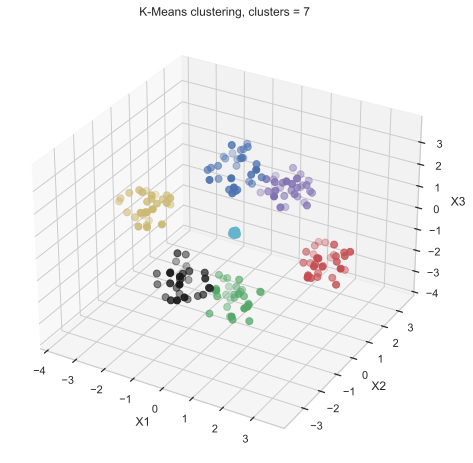

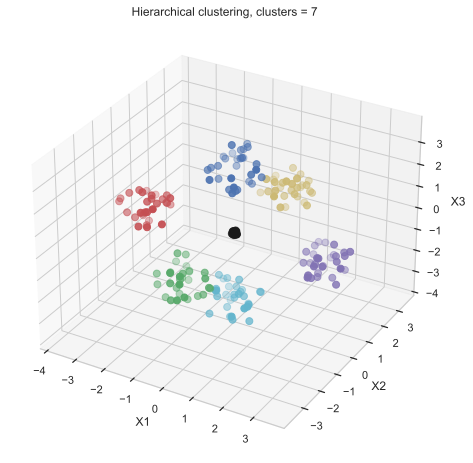

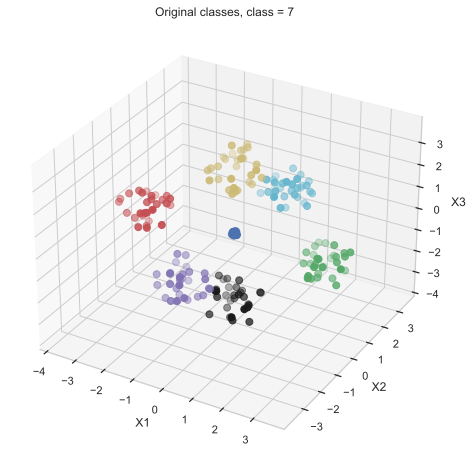

K-Means clustering, Purity = 1.0
Hierarchical clustering, Purity = 1.0
K-Means clustering, Rand = 1.0
Hierarchical clustering, Rand = 1.0
K-Means clustering, Mutual information score = 1.0
Hierarchical clustering, Mutual information score = 1.0


In [19]:
print('For Data set 1:')
hcplot('K-Means', k1, ds1)
hcplot('Hierarchical', K1, DS1)
plotori(df1)
purity('K-Means', ds1)
purity('Hierarchical', DS1)
rand('K-Means', ds1)
rand('Hierarchical', DS1)
mutualinfo('K-Means', ds1)
mutualinfo('Hierarchical', DS1)

Obviously, for data set 1, metrics are equal to 1. Both K-Means and Hierarchical algorithms perform perfectly, the clustering results are the same as the original classes.

For Data set 2:


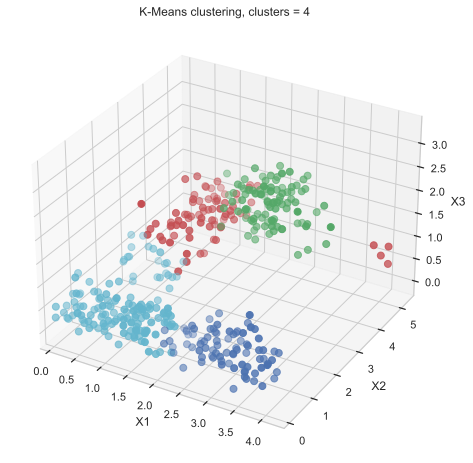

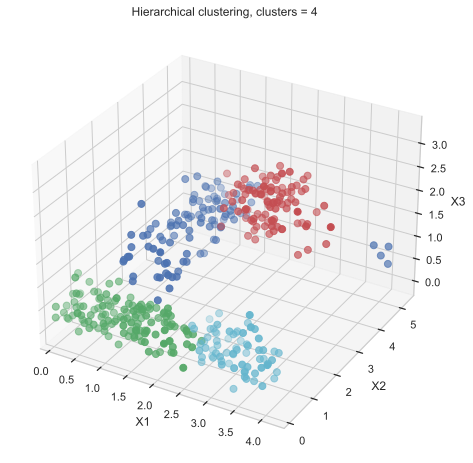

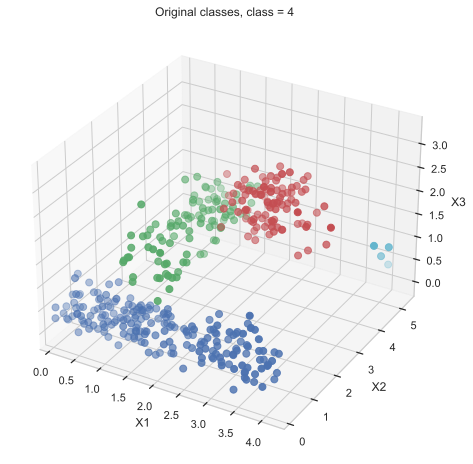

K-Means clustering, Purity = 0.9306930693069307
Hierarchical clustering, Purity = 0.9900990099009901
K-Means clustering, Rand = 0.5877644016112638
Hierarchical clustering, Rand = 0.7339089891331867
K-Means clustering, Mutual information score = 0.7227234211971405
Hierarchical clustering, Mutual information score = 0.8510276117074035


In [20]:
print('For Data set 2:')
hcplot('K-Means', k2, ds2)
hcplot('Hierarchical', K2, DS2)
plotori(df2)
purity('K-Means', ds2)
purity('Hierarchical', DS2)
rand('K-Means', ds2)
rand('Hierarchical', DS2)
mutualinfo('K-Means', ds2)
mutualinfo('Hierarchical', DS2)

For data set 2, the metrics are all near 1, both of the algorithms perform well. Hierarchical metrics are lager than K-Means. Hierarchical performs better than K-Means.

For Data set 3:


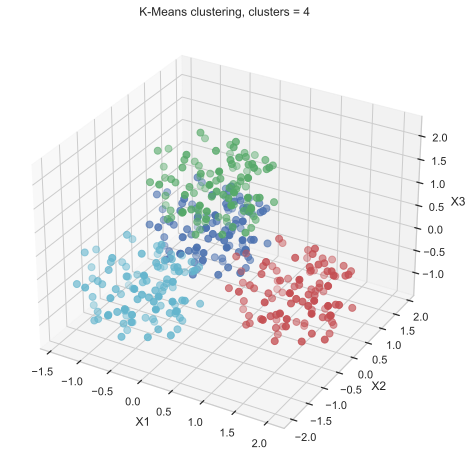

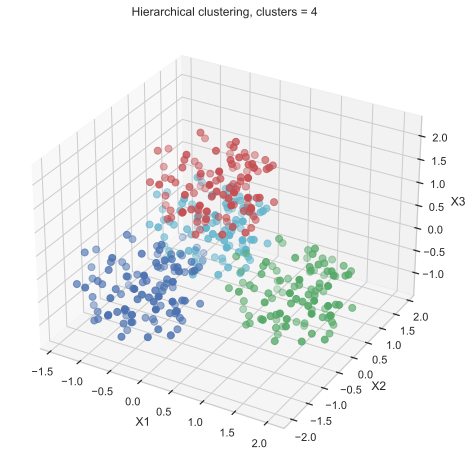

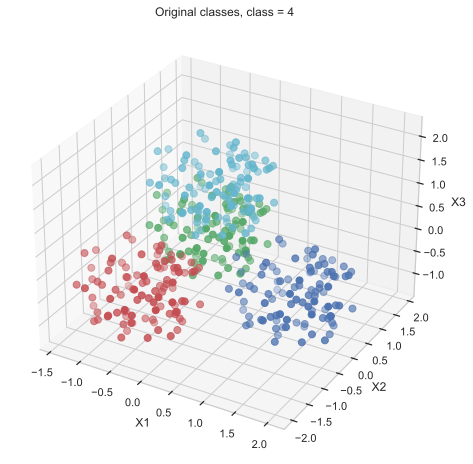

K-Means clustering, Purity = 1.0
Hierarchical clustering, Purity = 0.9875
K-Means clustering, Rand = 1.0
Hierarchical clustering, Rand = 0.9672676330087653
K-Means clustering, Mutual information score = 1.0
Hierarchical clustering, Mutual information score = 0.9636686786293007


In [21]:
print('For Data set 3:')
hcplot('K-Means', k3, ds3)
hcplot('Hierarchical', K3, DS3)
plotori(df3)
purity('K-Means', ds3)
purity('Hierarchical', DS3)
rand('K-Means', ds3)
rand('Hierarchical', DS3)
mutualinfo('K-Means', ds3)
mutualinfo('Hierarchical', DS3)

For data set 3, K-Means metrics are all 1 which means K-Means clusters are the same as the original. Hierarchical metrics are all near 1 showing an excellent performance.

For Data set 4:


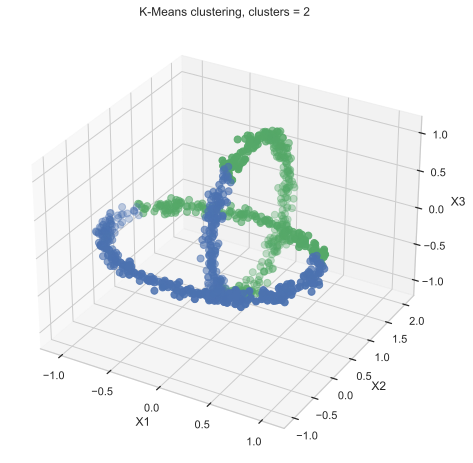

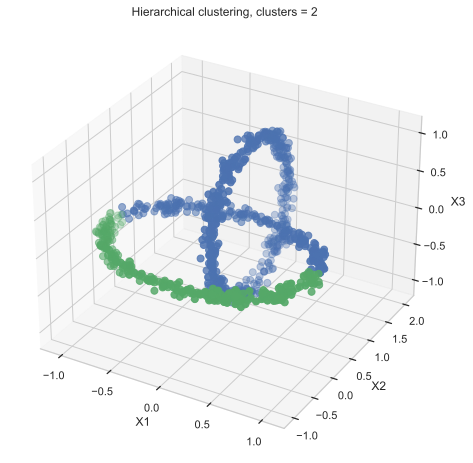

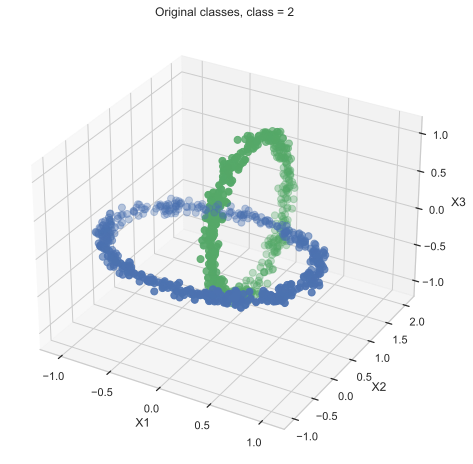

K-Means clustering, Purity = 0.654
Hierarchical clustering, Purity = 0.799
K-Means clustering, Rand = 0.0939570501002004
Hierarchical clustering, Rand = 0.35706442581215536
K-Means clustering, Mutual information score = 0.0688824373461325
Hierarchical clustering, Mutual information score = 0.41869902393117836


In [22]:
print('For Data set 4:')
hcplot('K-Means', k4, ds4)
hcplot('Hierarchical', K4, DS4)
plotori(df4)
purity('K-Means', ds4)
purity('Hierarchical', DS4)
rand('K-Means', ds4)
rand('Hierarchical', DS4)
mutualinfo('K-Means', ds4)
mutualinfo('Hierarchical', DS4)

For data set 4, by the plots, we can find that neither of them perform well. The matching accuracy is low. Hierarchical is better than K-Means.

For Data set 5:


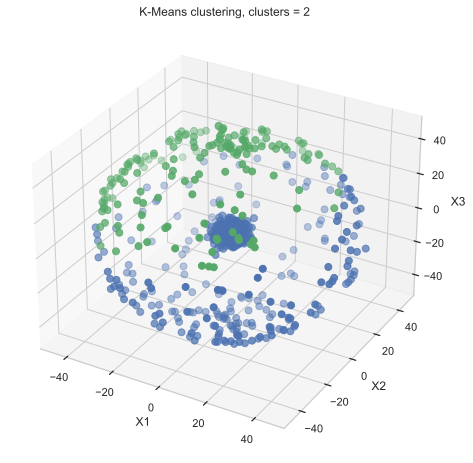

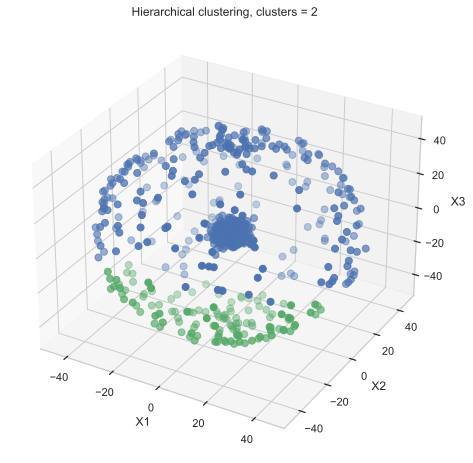

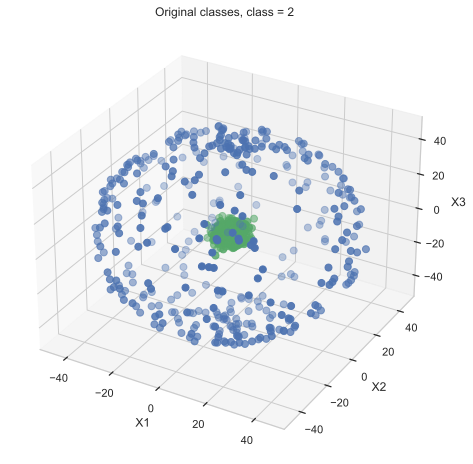

K-Means clustering, Purity = 0.71375
Hierarchical clustering, Purity = 0.6575
K-Means clustering, Rand = 0.18206807775637826
Hierarchical clustering, Rand = 0.09862621818643041
K-Means clustering, Mutual information score = 0.2923037752676178
Hierarchical clustering, Mutual information score = 0.21882677576382464


In [23]:
print('For Data set 5:')
hcplot('K-Means', k5, ds5)
hcplot('Hierarchical', K5, DS5)
plotori(df5)
purity('K-Means', ds5)
purity('Hierarchical', DS5)
rand('K-Means', ds5)
rand('Hierarchical', DS5)
mutualinfo('K-Means', ds5)
mutualinfo('Hierarchical', DS5)

For data set 5, by the plots, the data points around the origin are in the same class in original calsses, the others in another class. The clustering results are different from it. K-Means perform better than Hierarchical.

# Task 2
## Preprocess data set

In [24]:
df_worldindicators = pd.read_csv('World Indicators.csv')

In [25]:
sum(df_worldindicators.isnull().T.any())
len(df_worldindicators)

121

208

Find the number of empty data rows. 121 of 208 has empty data, so we fill the empty.

In [26]:
df_worldindicators.fillna(0,inplace=True)

In [27]:
df_worldindicators.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,0.000,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,0.0,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,0.000,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [28]:
# Clean Data: convert datatype from object to float ( remove’$’,’,’ from the dataset)
df_worldindicators.loc[:,'Business Tax Rate'] = df_worldindicators['Business Tax Rate'].str.strip('%').astype(float)/100
df_worldindicators.loc[:,'GDP']=df_worldindicators['GDP'].str.replace('$','').str.replace(',','').astype(float)
df_worldindicators.loc[:,'Health Exp/Capita']=df_worldindicators['Health Exp/Capita'].str.replace('$','').str.replace(',','').astype(float)

df_worldindicators.head()

/var/folders/8n/53__nr295cb0k9fmzrhgslsh0000gn/T/ipykernel_88919/1237162006.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_worldindicators.loc[:,'GDP']=df_worldindicators['GDP'].str.replace('$','').str.replace(',','').astype(float)
/var/folders/8n/53__nr295cb0k9fmzrhgslsh0000gn/T/ipykernel_88919/1237162006.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_worldindicators.loc[:,'Health Exp/Capita']=df_worldindicators['Health Exp/Capita'].str.replace('$','').str.replace(',','').astype(float)


,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,0.720,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,0.521,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,0.659,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,0.000,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,0.195,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,0.435,13.0,0.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,0.000,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [29]:
# apply integer 1-6 to stand for 6 different regions in order to make every columns(except for Country) involved in clustering methods
df_worldindicators.loc[df_worldindicators['Region']=='Africa','Region']=1
df_worldindicators.loc[df_worldindicators['Region']=='Europe','Region']=2
df_worldindicators.loc[df_worldindicators['Region']=='The Americas','Region']=3
df_worldindicators.loc[df_worldindicators['Region']=='Asia','Region']=4
df_worldindicators.loc[df_worldindicators['Region']=='Oceania','Region']=5
df_worldindicators.loc[df_worldindicators['Region']=='Middle East','Region']=6

In [30]:
# make several df_worldindicators(already cleaned) copies for using on later questions
df_worldindicators.fillna(0,inplace=True)
df_worldindicators_copy1 = df_worldindicators.copy()
df_worldindicators_copy2 = df_worldindicators.copy()
df_worldindicators_copy3 = df_worldindicators.copy()

## 1. Clustering
## 1-1 K-Means
When we use K-Means algorithm, we need to find the appropriate K value first. We plot against K to make an elbow plot to find our "inertia" values.

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Elbow method for optimal k')

Text(0.5, 0, 'K (number of clusters)')

Text(0, 0.5, 'SSE (Within-Cluster Distances)')

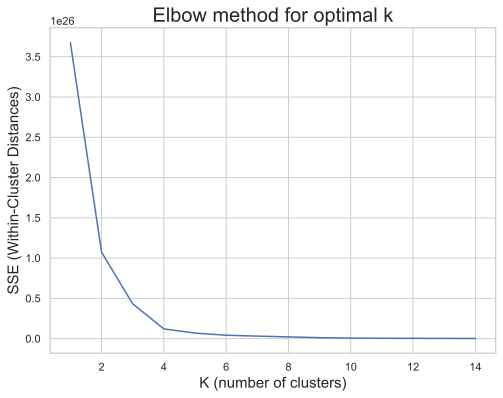

In [31]:
inertias = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_worldindicators_copy1.drop(columns=['Country']))
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,15), inertias)
plt.title('Elbow method for optimal k',fontsize=20)
plt.xlabel("K (number of clusters)",fontsize=15)
plt.ylabel("SSE (Within-Cluster Distances)",fontsize=15)
plt.show()

Looking at the plot, we can see that after K=4, the plot flattens out substantially. Therefore 4 is our "elbow" and we should probably choose K=4.

In [32]:
kmeans = KMeans(n_clusters=4)
pred = kmeans.fit_predict(df_worldindicators_copy1.drop(columns=['Country']))
df_worldindicators_copy1['pred']=kmeans.labels_
display(df_worldindicators_copy1.head())
display(df_worldindicators_copy1['pred'].value_counts())

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,pred
0,0.025,0.720,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,...,72.0,69.0,0.9,0.272,0.681,0.047,0.682,1,Algeria,0
1,0.046,0.521,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,...,53.0,50.0,0.5,0.477,0.499,0.024,0.409,1,Angola,0
2,0.037,0.659,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,...,60.0,58.0,0.8,0.432,0.539,0.029,0.423,1,Benin,0
3,0.024,0.195,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,...,46.0,47.0,1.5,0.340,0.625,0.035,0.565,1,Botswana,0
4,0.042,0.435,13.0,0.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,...,56.0,55.0,0.5,0.458,0.517,0.025,0.265,1,Burkina Faso,0


0    193
2     12
3      2
1      1
Name: pred, dtype: int64

## 1-2 Hierarchical clustering

In [33]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

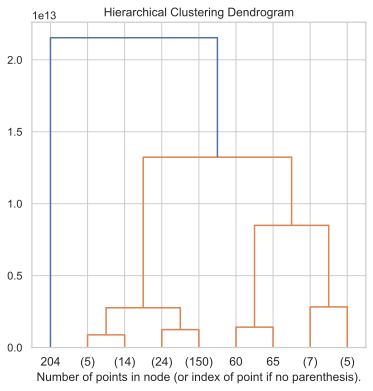

In [34]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df_worldindicators_copy2.drop(columns=['Country']))
plt.figure(figsize=(6,6))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

As shown in the K-Means approach as well, we can see a huge decrease in the distance metric when going from 1 to 2, 2 to 3 and 3 to 4. After 4 clusters, the decrease trend becomes quite smooth, so k=4 should be answer. 

In [35]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=4)
pred = model.fit_predict(df_worldindicators_copy2.drop(columns=['Country']))

In [36]:
df_worldindicators_copy2['pred'] = pred
display(df_worldindicators_copy2.head())
display(df_worldindicators_copy2['pred'].value_counts())

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,pred
0,0.025,0.720,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,...,72.0,69.0,0.9,0.272,0.681,0.047,0.682,1,Algeria,2
1,0.046,0.521,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,...,53.0,50.0,0.5,0.477,0.499,0.024,0.409,1,Angola,2
2,0.037,0.659,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,...,60.0,58.0,0.8,0.432,0.539,0.029,0.423,1,Benin,2
3,0.024,0.195,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,...,46.0,47.0,1.5,0.340,0.625,0.035,0.565,1,Botswana,2
4,0.042,0.435,13.0,0.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,...,56.0,55.0,0.5,0.458,0.517,0.025,0.265,1,Burkina Faso,2


2    193
0     12
1      2
3      1
Name: pred, dtype: int64

## 2. Internal validation

### SSE
$$SSE(C_i) = \sum_{x\in C_i}d(c_i,x)^2 = \frac{1}{2m_i}\sum_{x\in C_i}\sum_{y\in C_i}d(x,y)^2$$
where $x$ is an example in the cluster, $c_i$ is a cluster representative, $m_i$ is the number of examples in cluster $C_i$.  
Smaller $SSE$ indicates better performance.

In [37]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_worldindicators_copy3.drop(columns=['Country']))
kmeans.inertia_

KMeans(n_clusters=4)

1.2056190641452904e+25

### Silhouetter Coefficient
the average distance $a_i$:

$$a(i) = \frac{1}{\rvert{C_a}\rvert}\sum_{j\in C_a,i\neq j}d(i,j)$$
the minimum average distance $b_i$:

$$b(i) = \min_{C_b\neq C_a}\frac{1}{\rvert{C_b}\rvert}\sum_{j\in C_b}d(i,j)$$
Sihouette Coefficient:

$$s(i) = \frac{b(i)-a(i)}{max\{a(i),b(i)\}}$$

In [38]:
metrics.silhouette_score(df_worldindicators_copy3.drop(columns=['Country']),kmeans.labels_)

0.8910544567101041

the SHC metric(0.89) is close to 1, so the quality of this cluster method is excellent!

### Dunn Index
The lowest intercluster distance divided by the highest intracluster distance:

$$DI_m = \frac{min_{1\leq i<j\leq m}\delta (C_i,C_j)}{\max_{1\leq k\leq m}\Delta k}$$

In [39]:
from validclust import dunn
dunn(metrics.pairwise_distances(df_worldindicators_copy3.drop(columns=['Country'])),kmeans.labels_)

0.1318757876803419

## 3. Clustering solutions and detailed list

In [40]:
country_list = df_worldindicators_copy1['Country']
pred_list = df_worldindicators_copy1['pred']

In [41]:
# set 4 lists to store 4 kinds of countries
list1 = []
list2 = []
list3 = []
list4 = []

In [42]:
def detailed_list(country_list,pred_list):
    dict_report = {'cat1':list1,'cat2':list2,'cat3':list3,'cat4':list4}
    for i,pred in enumerate(pred_list):
        if pred==0:
            list1.append(country_list[i])
        if pred==1:
            list2.append(country_list[i])
        if pred==2:
            list3.append(country_list[i])
        if pred==3:
            list4.append(country_list[i])
    return dict_report

In [43]:
detailed = detailed_list(country_list,pred_list)
len(detailed)

4

In [44]:
cat1 = detailed['cat1']
cat2 = detailed['cat2']
cat3 = detailed['cat3']
cat4 = detailed['cat4']
print(f'Cluster 1 contains {cat1}\n')
print(f'Cluster 2 contains {cat2}\n')
print(f'Cluster 3 contains {cat3}\n')
print(f'Cluster 4 contains {cat4}\n')

Cluster 1 contains ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'Georgia', 'Hong Kong SAR, China', 'Indonesia', 'Kazakhstan', 'Korea, Dem. Rep.', 'Kyrgyz Republic', 'Lao PDR', 'Macao SAR, China', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Pakistan', 'Philippi

## Scatter plot

In [45]:
def vsplot(column1,column2):
    plt.figure(figsize=(8,8))
    df1 = df_worldindicators_copy1[df_worldindicators_copy1['pred']==0]
    df2 = df_worldindicators_copy1[df_worldindicators_copy1['pred']==1]
    df3 = df_worldindicators_copy1[df_worldindicators_copy1['pred']==2]
    df4 = df_worldindicators_copy1[df_worldindicators_copy1['pred']==3]
    plt.scatter(df1[column1],df1[column2],color='green')
    plt.scatter(df2[column1],df2[column2],color='magenta')
    plt.scatter(df3[column1],df3[column2],color='orange')
    plt.scatter(df4[column1],df4[column2],color='blue')
    plt.title("clustering reslut",fontweight='bold',fontsize=20)
    plt.xlabel(column1,fontsize=15)
    plt.ylabel(column2,fontsize=15)
    plt.legend(('c1','c2','c3','c4'),loc='best')
    plt.show()

#### Population urban VS GDP

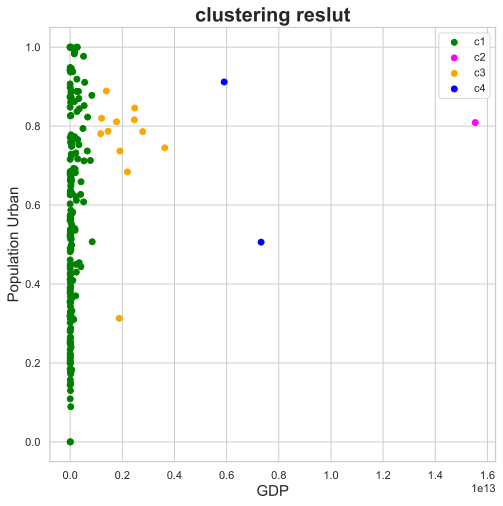

In [46]:
vsplot('GDP','Population Urban')

#### Business Tax Rate vs Population 0-14

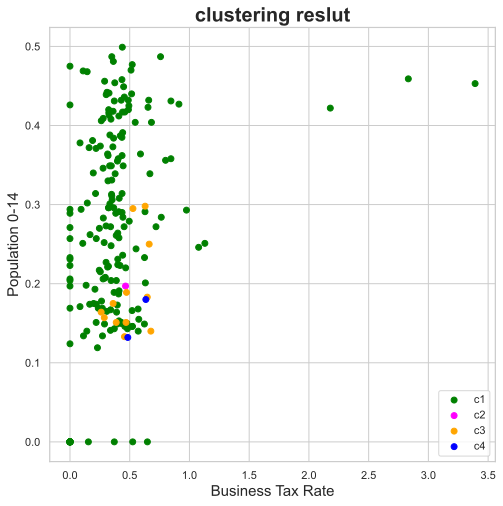

In [47]:
vsplot('Business Tax Rate','Population 0-14')

#### Health Exp/Capita vs Health Exp % GDP

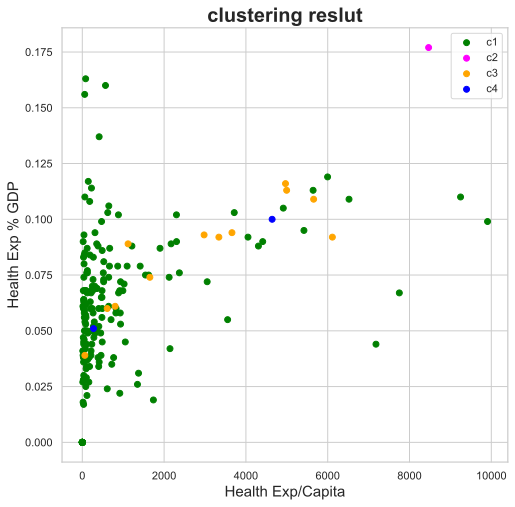

In [48]:
vsplot('Health Exp/Capita','Health Exp % GDP')